## Importing Libraries

In [1]:
import numpy as np  # Linear algebra and numerical computations
import pandas as pd  # Data processing and CSV file I/O (e.g., pd.read_csv)
import matplotlib.pyplot as plt  # Plotting library for data visualization
from tensorflow.keras.models import load_model  # Load pre-trained Keras models
from sklearn.model_selection import train_test_split  # Splitting dataset into training and testing sets
from tensorflow.keras.preprocessing import image as keras_image  # Image processing utilities for Keras
from sklearn.model_selection import StratifiedKFold  # Stratified K-Folds cross-validator
from keras.layers import GlobalAveragePooling2D, Dense, BatchNormalization  # Keras layers for model building
from keras.models import Model  # Keras model API for creating complex models
from keras.optimizers import Adam  # Adam optimizer for training the model
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, LearningRateScheduler  # Callbacks for training control
from tensorflow.keras import regularizers  # Regularization techniques for Keras models
from tensorflow.keras.models import Sequential  # Sequential model for building simple models layer by layer
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization  # Convolutional layers and more
from sklearn.metrics import roc_curve, auc  # Metrics for evaluating model performance
import seaborn as sns  # Statistical data visualization based on Matplotlib
from sklearn.metrics import confusion_matrix, classification_report  # Metrics for classification evaluation
import time  # Time-related functions


In [2]:
# Input data files are available in the read-only "../input/" directory
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/data-egg/datset-egg/data_resized/Responders/r_sw_am_RS10EC_d_t3_03.jpg
/kaggle/input/data-egg/datset-egg/data_resized/Responders/r_sw_am_RS7EC_d_cz_08.jpg
/kaggle/input/data-egg/datset-egg/data_resized/Responders/r_sw_am_RS10EC_d_f8_05.jpg
/kaggle/input/data-egg/datset-egg/data_resized/Responders/r_sw_am_RS9EC_d_cz_04.jpg
/kaggle/input/data-egg/datset-egg/data_resized/Responders/r_sw_am_RS5EC_d_c4_07.jpg
/kaggle/input/data-egg/datset-egg/data_resized/Responders/r_sw_am_RS2EC_d_f4_01.jpg
/kaggle/input/data-egg/datset-egg/data_resized/Responders/r_sw_am_RS15EC_d_p3_03.jpg
/kaggle/input/data-egg/datset-egg/data_resized/Responders/r_sw_am_RS6EC_d_f7_09.jpg
/kaggle/input/data-egg/datset-egg/data_resized/Responders/r_sw_am_RS14EC_d_cz_06.jpg
/kaggle/input/data-egg/datset-egg/data_resized/Responders/r_sw_am_RS6EC_d_o1_02.jpg
/kaggle/input/data-egg/datset-egg/data_resized/Responders/r_sw_am_RS3EC_d_f8_01.jpg
/kaggle/input/data-egg/datset-egg/data_resized/Responders/r_sw_am_RS1EC_

In [3]:
folder_path = "/kaggle/input/data-egg/datset-egg/data_resized/Responders"
image_extensions = [".jpg", ".jpeg", ".png", ".gif", ".bmp", ".tiff"]  
# Get the list of all files in the folder
all_files = os.listdir(folder_path)
# Filter out only the image files
image_files = [file for file in all_files if any(file.lower().endswith(ext) for ext in image_extensions)]
# Count the number of images
num_images = len(image_files)
print(f"Number of images in {folder_path}: {num_images}")

Number of images in /kaggle/input/data-egg/datset-egg/data_resized/Responders: 2166


In [ ]:
folder_path = "/kaggle/input/data-egg/datset-egg/data_resized/Non_Responders"
image_extensions = [".jpg", ".jpeg", ".png", ".gif", ".bmp", ".tiff"]  
# Get the list of all files in the folder
all_files = os.listdir(folder_path)
# Filter out only the image files
image_files = [file for file in all_files if any(file.lower().endswith(ext) for ext in image_extensions)]
# Count the number of images
num_images = len(image_files)
print(f"Number of images in {folder_path}: {num_images}")

In [4]:
Responders = 2166
Non_Responders = 3249
Total_Dataset_images  = Responders+Non_Responders
print("Total Number of images",Total_Dataset_images)

Total Number of images 5415


In [5]:
# Define the base path
base_path = "/kaggle/input/data-egg/datset-egg/data_resized"
# Initialize lists to store paths and labels
paths = []
labels = []
# Traverse through the folders and collect paths and labels
for folder in ["Responders", "Non_Responders"]:
    folder_path = os.path.join(base_path, folder)
    # Iterate through files in the folder
    for file in os.listdir(folder_path):
        file_path = os.path.join(folder_path, file)
        # Append path and label to the lists
        paths.append(file_path)
        labels.append(folder)
# Create a DataFrame
df = pd.DataFrame({"path": paths, "label": labels})
# Display the DataFrame
df

,path,label
0,/kaggle/input/data-egg/datset-egg/data_resized...,Responders
1,/kaggle/input/data-egg/datset-egg/data_resized...,Responders
2,/kaggle/input/data-egg/datset-egg/data_resized...,Responders
3,/kaggle/input/data-egg/datset-egg/data_resized...,Responders
4,/kaggle/input/data-egg/datset-egg/data_resized...,Responders
...,...,...
5410,/kaggle/input/data-egg/datset-egg/data_resized...,Non_Responders
5411,/kaggle/input/data-egg/datset-egg/data_resized...,Non_Responders
5412,/kaggle/input/data-egg/datset-egg/data_resized...,Non_Responders
5413,/kaggle/input/data-egg/datset-egg/data_resized...,Non_Responders


In [6]:
df["label"].value_counts()

label
Non_Responders    3249
Responders        2166
Name: count, dtype: int64

In [7]:
df.to_csv("EEG_Scalagram_Dataset.csv", index=False)

In [8]:
df = pd.read_csv("EEG_Scalagram_Dataset.csv")

df.head()

,path,label
0,/kaggle/input/data-egg/datset-egg/data_resized...,Responders
1,/kaggle/input/data-egg/datset-egg/data_resized...,Responders
2,/kaggle/input/data-egg/datset-egg/data_resized...,Responders
3,/kaggle/input/data-egg/datset-egg/data_resized...,Responders
4,/kaggle/input/data-egg/datset-egg/data_resized...,Responders


In [9]:
df["label"].value_counts()

label
Non_Responders    3249
Responders        2166
Name: count, dtype: int64

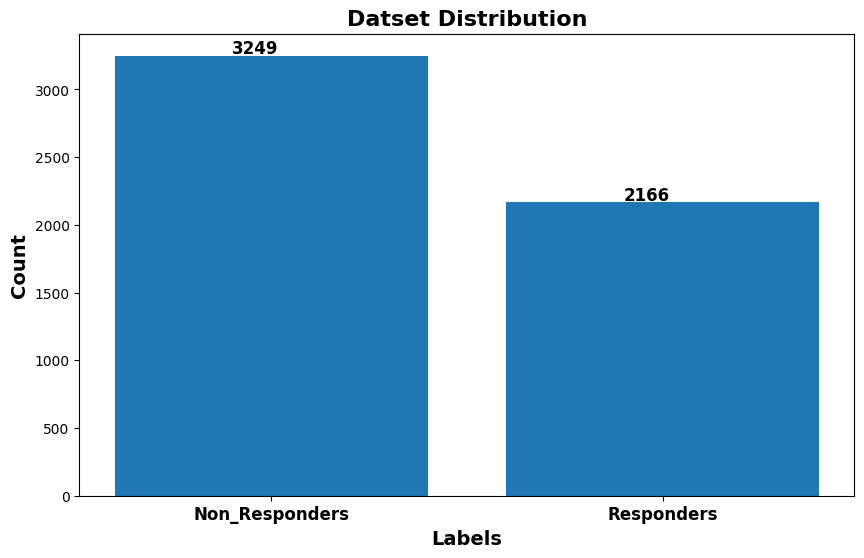

In [10]:
label_counts = df["label"].value_counts()
# Plotting the bar plot with count representation
fig, ax = plt.subplots(figsize=(10, 6)) 
bars = plt.bar(label_counts.index, label_counts.values, linewidth=1.5)
# Customize x-label and y-label size
plt.xlabel('Labels', fontsize=14, fontweight='bold')
plt.ylabel('Count', fontsize=14, fontweight='bold')
# Customize x-tick labels size and make them bold
plt.xticks(fontsize=12, fontweight='bold')
# Increase space between bars and count numbers
for bar, count in zip(bars, label_counts.values):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, bar.get_height() + 15, str(count), fontsize=12, fontweight='bold')
# Add a border to the bars
for bar in bars:
    bar.set_linewidth(1.5)
# Title of the plot
plt.title('Datset Distribution', fontsize=16, fontweight='bold')
# Show the plot
plt.show()

## Splitting  Training and Testing

stratify ensures that both the training and test sets maintain a similar class distribution as the original dataset.

In [15]:
# Calculate the number of images for each class in the test set
test_size_percent = 0.1
num_responders_test = round(2166 * test_size_percent)  # Round to the nearest integer
num_non_responders_test = round(3249 * test_size_percent)  # Round to the nearest integer
# Split the dataset into train and test sets
train_df, test_df = train_test_split(df, test_size=test_size_percent, stratify=df['label'], random_state=42)
# Displaying the shapes of the resulting DataFrames
print("Train set shape:", train_df.shape)
print("Test set shape:", test_df.shape)
# Print the number of images in each class for the test set
print("Number of Responders in Test Set:", num_responders_test)
print("Number of Non_Responders in Test Set:", num_non_responders_test)

Train set shape: (4873, 2)
Test set shape: (542, 2)
Number of Responders in Test Set: 217
Number of Non_Responders in Test Set: 325


## Splitting Training and Validation

In [17]:
# Set up StratifiedKFold with 5 folds
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
# Initialize lists to store training and validation sets
fold_train_dfs = []
fold_val_dfs = []
# Split the training set into 5 folds
for train_index, val_index in skf.split(train_df['path'], train_df['label']):
    train_fold = train_df.iloc[train_index]
    val_fold = train_df.iloc[val_index]
    # Append to the lists
    fold_train_dfs.append(train_fold)
    fold_val_dfs.append(val_fold)
# Print the number of images in each class for each fold
for fold, (train_fold, val_fold) in enumerate(zip(fold_train_dfs, fold_val_dfs), 1):
    print(f"Fold {fold} - Training Set Class Distribution:")
    print(train_fold['label'].value_counts())
    print(f"\nFold {fold} - Validation Set Class Distribution:")
    print(val_fold['label'].value_counts())
    print("\n" + "-"*40)

Fold 1 - Training Set Class Distribution:
label
Non_Responders    2339
Responders        1559
Name: count, dtype: int64

Fold 1 - Validation Set Class Distribution:
label
Non_Responders    585
Responders        390
Name: count, dtype: int64

----------------------------------------
Fold 2 - Training Set Class Distribution:
label
Non_Responders    2339
Responders        1559
Name: count, dtype: int64

Fold 2 - Validation Set Class Distribution:
label
Non_Responders    585
Responders        390
Name: count, dtype: int64

----------------------------------------
Fold 3 - Training Set Class Distribution:
label
Non_Responders    2339
Responders        1559
Name: count, dtype: int64

Fold 3 - Validation Set Class Distribution:
label
Non_Responders    585
Responders        390
Name: count, dtype: int64

----------------------------------------
Fold 4 - Training Set Class Distribution:
label
Non_Responders    2340
Responders        1559
Name: count, dtype: int64

Fold 4 - Validation Set Class 

In [19]:
train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)
val_datagen = ImageDataGenerator(rescale = 1./255)

In [20]:
def cnn_model():
    model = Sequential()
    
    model.add(Conv2D(4, (3, 3), activation='relu', input_shape=(224, 224, 3)))
    model.add(BatchNormalization())
    

    model.add(Conv2D(6, (3, 3), activation='relu'))
    model.add(BatchNormalization())
    

    model.add(Conv2D(8, (3, 3), activation='relu'))
    model.add(BatchNormalization())
    

    model.add(Conv2D(12, (3, 3), activation='relu'))
    model.add(BatchNormalization())
    

    model.add(Flatten())
    
    model.add(Dropout(0.25))

    model.add(Dense(1, activation='sigmoid'))
   
    # Compile the model with the specified learning rate
    learning_rate = 0.0001
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    
    # Build the model
    model.build((None, 224, 224, 3))
    
    return model


In [21]:
# Create model
model = cnn_model()

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [22]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 4)    │           112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 222, 222, 4)    │            16 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 220, 220, 6)    │           222 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 220, 220, 6)    │            24 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 218, 218, 8)    │           440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 218, 218, 8)    │            32 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 216, 216, 12)   │           876 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 216, 216, 12)   │            48 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 559872)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 559872)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │       559,873 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 561,643 (2.14 MB)

 Trainable params: 561,583 (2.14 MB)

 Non-trainable params: 60 (240.00 B)

In [23]:
# Initialize EarlyStopping 
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

Fold 1
Start Time: 2024-02-08 16:17:42
Found 3898 validated image filenames belonging to 2 classes.
train_generator classes {'Non_Responders': 0, 'Responders': 1}
Found 975 validated image filenames belonging to 2 classes.
val_generator classes {'Non_Responders': 0, 'Responders': 1}
Epoch 1/10


I0000 00:00:1707409076.030309     124 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


122/122 [==============================] - 72s 499ms/step - loss: 1.2633 - accuracy: 0.7760 - val_loss: 0.6492 - val_accuracy: 0.6800
Epoch 2/10
122/122 [==============================] - 24s 196ms/step - loss: 0.0721 - accuracy: 0.9761 - val_loss: 0.5646 - val_accuracy: 0.7333
Epoch 3/10
122/122 [==============================] - 22s 183ms/step - loss: 0.0261 - accuracy: 0.9962 - val_loss: 0.3262 - val_accuracy: 0.8728
Epoch 4/10
122/122 [==============================] - 23s 188ms/step - loss: 0.0128 - accuracy: 0.9995 - val_loss: 0.1830 - val_accuracy: 0.9262
Epoch 5/10
122/122 [==============================] - 24s 197ms/step - loss: 0.0077 - accuracy: 1.0000 - val_loss: 0.0689 - val_accuracy: 0.9785
Epoch 6/10
122/122 [==============================] - 24s 193ms/step - loss: 0.0047 - accuracy: 1.0000 - val_loss: 0.0648 - val_accuracy: 0.9723
Epoch 7/10
122/122 [==============================] - 24s 197ms/step - loss: 0.0037 - accuracy: 0.9997 - val_loss: 0.0559 - val_accuracy: 0.9

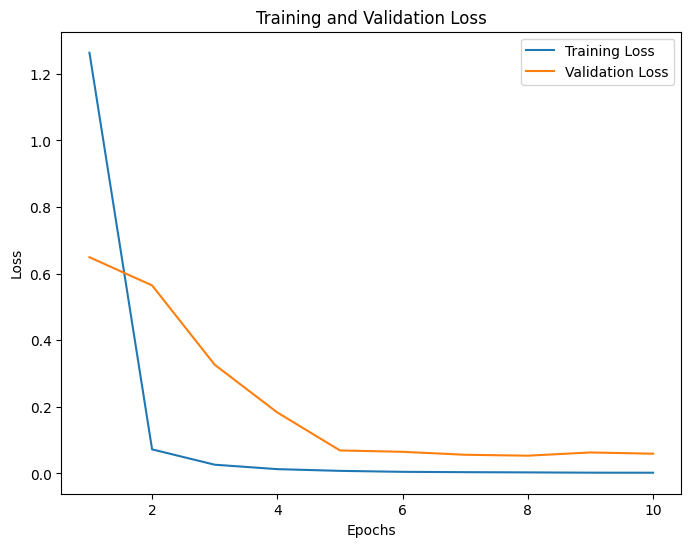

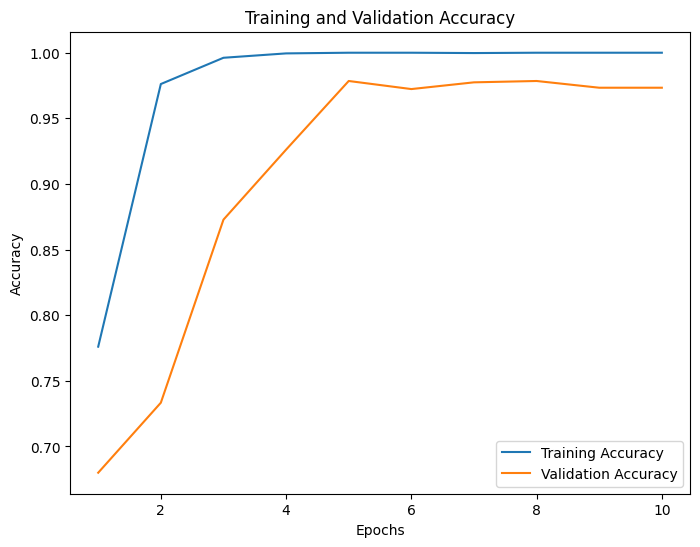

Fold 2
Start Time: 2024-02-08 16:22:35
Found 3898 validated image filenames belonging to 2 classes.
train_generator classes {'Non_Responders': 0, 'Responders': 1}
Found 975 validated image filenames belonging to 2 classes.
val_generator classes {'Non_Responders': 0, 'Responders': 1}
Epoch 1/10
122/122 [==============================] - 24s 195ms/step - loss: 0.0249 - accuracy: 0.9915 - val_loss: 0.0135 - val_accuracy: 0.9979
Epoch 2/10
122/122 [==============================] - 23s 190ms/step - loss: 0.0080 - accuracy: 0.9982 - val_loss: 0.0026 - val_accuracy: 1.0000
Epoch 3/10
122/122 [==============================] - 23s 185ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.0012 - val_accuracy: 1.0000
Epoch 4/10
122/122 [==============================] - 23s 186ms/step - loss: 9.9796e-04 - accuracy: 1.0000 - val_loss: 0.0010 - val_accuracy: 1.0000
Epoch 5/10
122/122 [==============================] - 24s 197ms/step - loss: 7.2884e-04 - accuracy: 1.0000 - val_loss: 9.4498e-04 - 

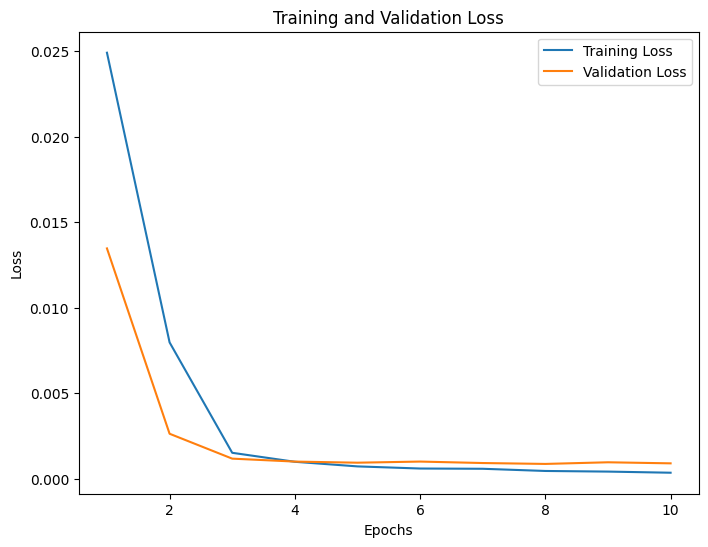

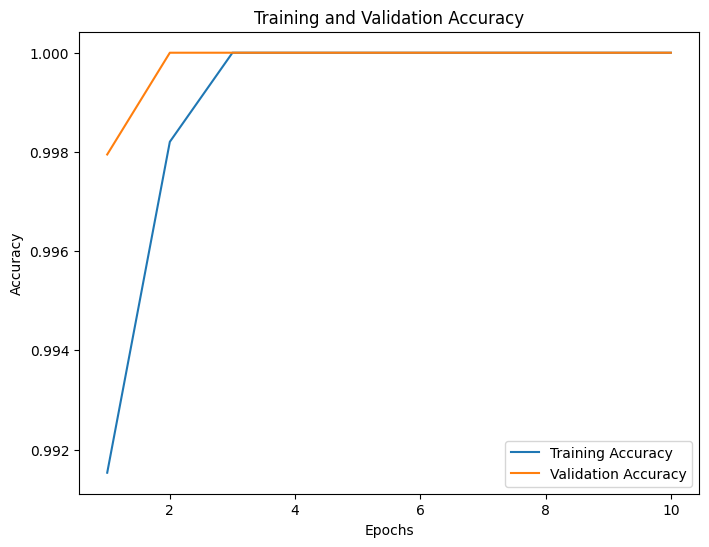

Fold 3
Start Time: 2024-02-08 16:26:31
Found 3898 validated image filenames belonging to 2 classes.
train_generator classes {'Non_Responders': 0, 'Responders': 1}
Found 975 validated image filenames belonging to 2 classes.
val_generator classes {'Non_Responders': 0, 'Responders': 1}
Epoch 1/10
122/122 [==============================] - 24s 200ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 2.1225e-04 - val_accuracy: 1.0000
Epoch 2/10
122/122 [==============================] - 24s 198ms/step - loss: 3.7621e-04 - accuracy: 1.0000 - val_loss: 1.7741e-04 - val_accuracy: 1.0000
Epoch 3/10
122/122 [==============================] - 23s 184ms/step - loss: 3.4302e-04 - accuracy: 1.0000 - val_loss: 1.6978e-04 - val_accuracy: 1.0000
Epoch 4/10
122/122 [==============================] - 23s 188ms/step - loss: 2.7044e-04 - accuracy: 1.0000 - val_loss: 1.5708e-04 - val_accuracy: 1.0000
Epoch 5/10
122/122 [==============================] - 24s 194ms/step - loss: 2.1659e-04 - accuracy: 1.0000 -

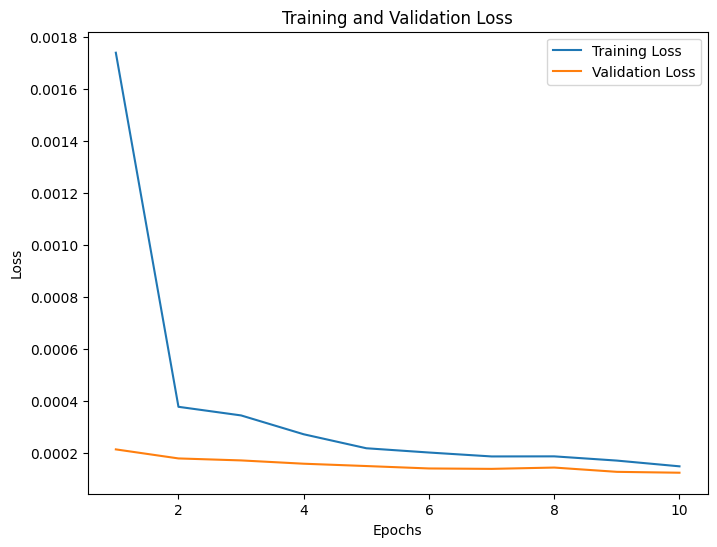

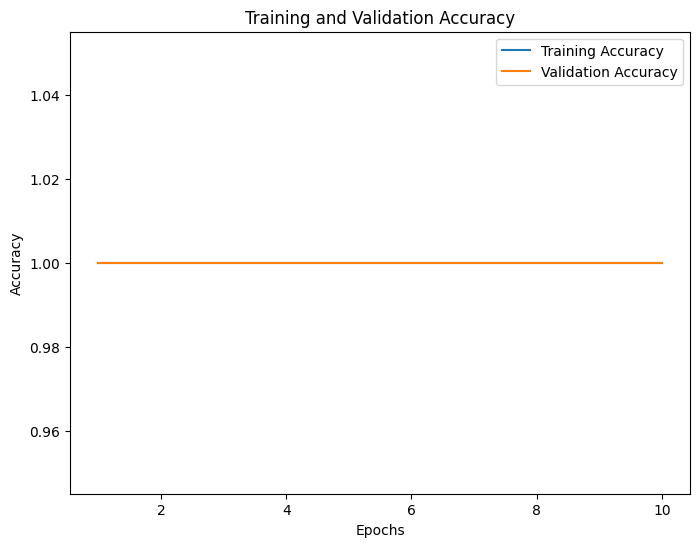

Fold 4
Start Time: 2024-02-08 16:30:28
Found 3899 validated image filenames belonging to 2 classes.
train_generator classes {'Non_Responders': 0, 'Responders': 1}
Found 974 validated image filenames belonging to 2 classes.
val_generator classes {'Non_Responders': 0, 'Responders': 1}
Epoch 1/10
122/122 [==============================] - 26s 213ms/step - loss: 1.5829e-04 - accuracy: 1.0000 - val_loss: 7.1684e-05 - val_accuracy: 1.0000
Epoch 2/10
122/122 [==============================] - 23s 186ms/step - loss: 1.9516e-04 - accuracy: 1.0000 - val_loss: 7.2009e-05 - val_accuracy: 1.0000
Epoch 3/10
122/122 [==============================] - 23s 189ms/step - loss: 1.2989e-04 - accuracy: 1.0000 - val_loss: 6.8707e-05 - val_accuracy: 1.0000
Epoch 4/10
122/122 [==============================] - 23s 186ms/step - loss: 1.1899e-04 - accuracy: 1.0000 - val_loss: 6.4377e-05 - val_accuracy: 1.0000
Epoch 5/10
122/122 [==============================] - 23s 190ms/step - loss: 1.1591e-04 - accuracy: 1.00

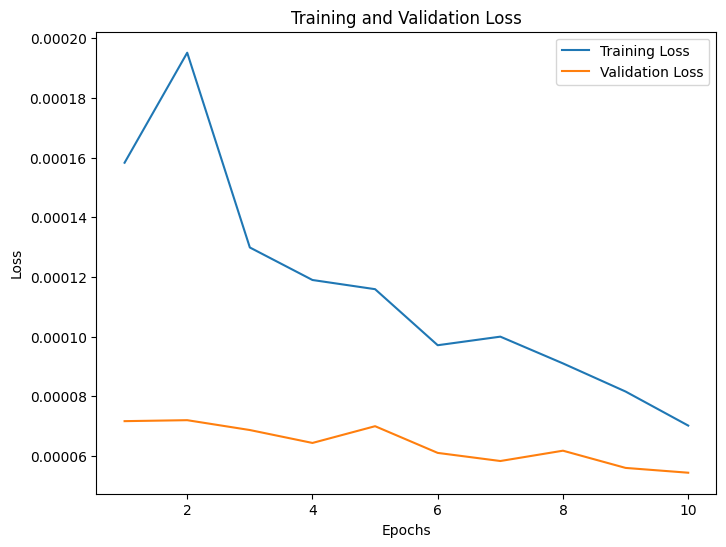

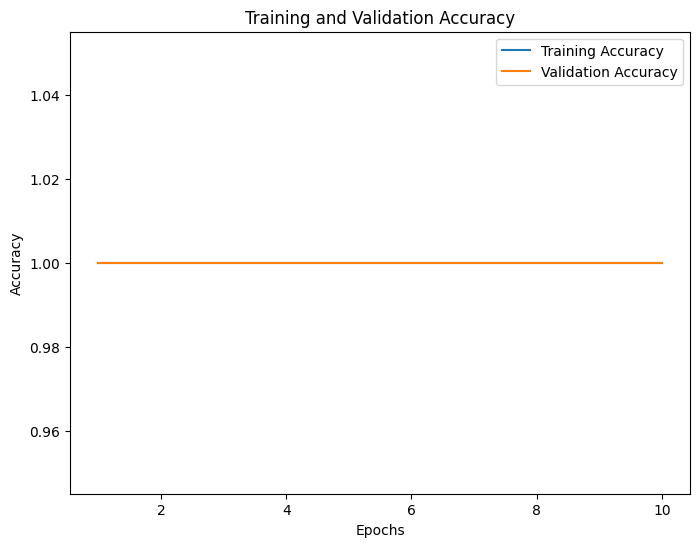

Fold 5
Start Time: 2024-02-08 16:34:27
Found 3899 validated image filenames belonging to 2 classes.
train_generator classes {'Non_Responders': 0, 'Responders': 1}
Found 974 validated image filenames belonging to 2 classes.
val_generator classes {'Non_Responders': 0, 'Responders': 1}
Epoch 1/10
122/122 [==============================] - 23s 188ms/step - loss: 7.1461e-05 - accuracy: 1.0000 - val_loss: 3.7250e-05 - val_accuracy: 1.0000
Epoch 2/10
122/122 [==============================] - 23s 192ms/step - loss: 6.7515e-05 - accuracy: 1.0000 - val_loss: 3.4769e-05 - val_accuracy: 1.0000
Epoch 3/10
122/122 [==============================] - 24s 193ms/step - loss: 6.4824e-05 - accuracy: 1.0000 - val_loss: 3.3611e-05 - val_accuracy: 1.0000
Epoch 4/10
122/122 [==============================] - 22s 178ms/step - loss: 6.2786e-05 - accuracy: 1.0000 - val_loss: 3.3588e-05 - val_accuracy: 1.0000
Epoch 5/10
122/122 [==============================] - 23s 188ms/step - loss: 5.1837e-05 - accuracy: 1.00

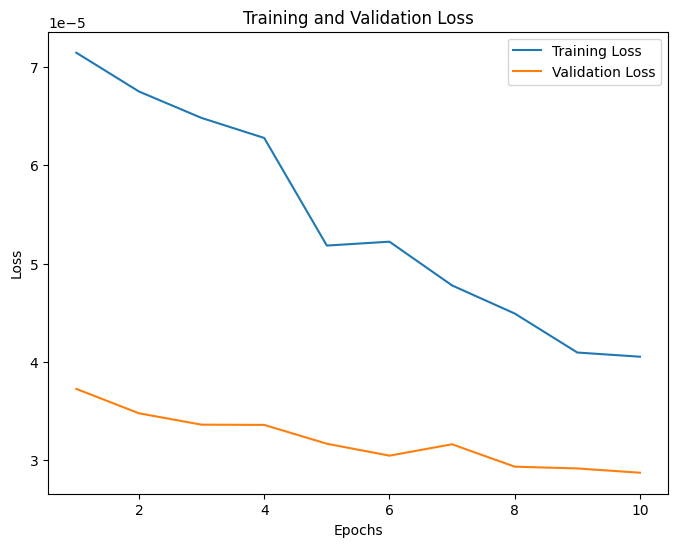

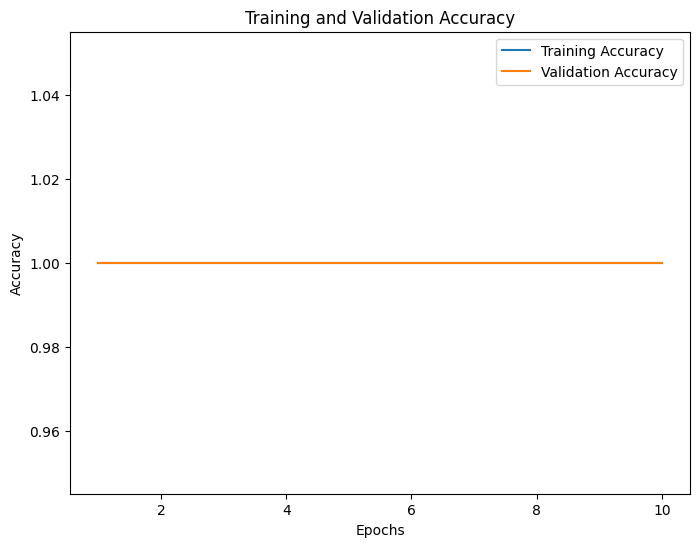

Total Training Time: 1237.25 seconds


In [ ]:
# Number of epochs and batch size
epochs = 10
batch_size = 32

# Initialize lists to store loss and accuracy values
all_train_loss = []
all_val_loss = []
all_train_acc = []
all_val_acc = []

# Initialize lists to store start and end times
all_start_times = []
all_end_times = []

# Loop through the folds and fit the model
for i in range(5):
    print("Fold", i + 1)

    # Record the start time for the current fold
    start_time = time.time()
    all_start_times.append(start_time)
    print("Start Time:", time.strftime("%Y-%m-%d %H:%M:%S", time.localtime(start_time)))

    # Get the current fold's training and validation sets
    fold_train = fold_train_dfs[i]
    fold_val = fold_val_dfs[i]

    # Training generator
    train_generator = train_datagen.flow_from_dataframe(
        dataframe=fold_train,
        x_col='path',
        y_col='label',
        target_size=(224, 224),
        batch_size=batch_size,
        seed=42,
        shuffle=True,
        class_mode='binary'
    )
    print("train_generator classes", train_generator.class_indices)

    # Validation generator
    val_generator = val_datagen.flow_from_dataframe(
        dataframe=fold_val,
        x_col='path',
        y_col='label',
        target_size=(224, 224),
        batch_size=batch_size,
        seed=42,
        shuffle=True,
        class_mode='binary'
    )
    print("val_generator classes", val_generator.class_indices)

    # Fit the model on the current fold's training and validation data
    history = model.fit(
        train_generator,
        epochs=epochs,
        verbose=1,
        validation_data=val_generator,
        callbacks=[early_stop]
    )

    # Record the end time for the current fold
    end_time = time.time()
    all_end_times.append(end_time)
    print("End Time:", time.strftime("%Y-%m-%d %H:%M:%S", time.localtime(end_time)))

    # Calculate and print the elapsed time for the current fold
    elapsed_time = end_time - start_time
    print("Elapsed Time for Fold {}: {:.2f} seconds\n".format(i + 1, elapsed_time))

    # Print the training and validation loss and accuracy
    train_loss = history.history['loss']
    val_loss = history.history['val_loss']
    train_acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    print("Training Loss:", train_loss)
    print("Validation Loss:", val_loss)
    print("Training Accuracy:", train_acc)
    print("Validation Accuracy:", val_acc)

    # Append the loss and accuracy values to the lists
    all_train_loss.append(train_loss)
    all_val_loss.append(val_loss)
    all_train_acc.append(train_acc)
    all_val_acc.append(val_acc)

    # Plot the training and validation loss
    plt.figure(figsize=(8, 6))
    plt.plot(range(1, len(history.epoch) + 1), train_loss, label='Training Loss')
    plt.plot(range(1, len(history.epoch) + 1), val_loss, label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss')
    plt.legend()
    plt.show()

    # Plot the training and validation accuracy
    plt.figure(figsize=(8, 6))
    plt.plot(range(1, len(history.epoch) + 1), train_acc, label='Training Accuracy')
    plt.plot(range(1, len(history.epoch) + 1), val_acc, label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.legend()
    plt.show()

# Calculate and print the total training time
total_training_time = sum(all_end_times) - sum(all_start_times)
print("Total Training Time: {:.2f} seconds".format(total_training_time))


In [49]:
# Calculate and print the average loss and accuracy
avg_train_loss = [sum(epoch_loss) / len(epoch_loss) for epoch_loss in all_train_loss]
avg_val_loss = [sum(epoch_loss) / len(epoch_loss) for epoch_loss in all_val_loss]
avg_train_acc = [sum(epoch_acc) / len(epoch_acc) for epoch_acc in all_train_acc]
avg_val_acc = [sum(epoch_acc) / len(epoch_acc) for epoch_acc in all_val_acc]

print("Average Training Loss:", avg_train_loss)
print("Average Validation Loss:", avg_val_loss)
print("Average Training Accuracy:", avg_train_acc)
print("Average Validation Accuracy:", avg_val_acc)

Average Training Loss: [0.13976763538084924, 0.003857041971059516, 0.0003832606074865907, 0.00011582270744838751, 5.448338051792234e-05]
Average Validation Loss: [0.20880147628486156, 0.002392794471234083, 0.00015310945018427448, 6.38327266642591e-05, 3.2018154342949856e-05]
Average Training Accuracy: [0.9747562885284424, 0.998973834514618, 1.0, 1.0, 1.0]
Average Validation Accuracy: [0.9065641105175019, 0.9997948706150055, 1.0, 1.0, 1.0]


In [50]:
# Calculate and print the average loss and accuracy
mean_train_loss = sum(avg_train_loss) / len(avg_train_loss)
mean_val_loss = sum(avg_val_loss) / len(avg_val_loss)
mean_train_acc = sum(avg_train_acc) / len(avg_train_acc)
mean_val_acc = sum(avg_val_acc) / len(avg_val_acc)

print("Mean Training Loss:", mean_train_loss)
print("Mean Validation Loss:", mean_val_loss)
print("Mean Training Accuracy:", mean_train_acc)
print("Mean Validation Accuracy:", mean_val_acc)

Mean Training Loss: 0.02883564880947233
Mean Validation Loss: 0.042288646217457426
Mean Training Accuracy: 0.994746024608612
Mean Validation Accuracy: 0.9812717962265015


In [51]:
import time

# Record start time
start_time = time.time()

# Setting the test set as the final evaluation set
evaluation_set = test_df

# Print the length of the evaluation set
print("Evaluation set length:", len(evaluation_set))

# Evaluate the model on the evaluation set
evaluation_generator = test_datagen.flow_from_dataframe(
    dataframe=evaluation_set,
    x_col='path',
    y_col='label',
    target_size=(224, 224),
    batch_size=batch_size,
    seed=1234,
    shuffle=False,
    class_mode='binary'
)
print("evaluation_generator classes", evaluation_generator.class_indices)

evaluation_loss, evaluation_accuracy = model.evaluate(evaluation_generator)

# Record end time
end_time = time.time()

# Calculate and print the time taken for evaluation
elapsed_time = end_time - start_time
print("Time taken for evaluation:", elapsed_time, "seconds")

print("Evaluation Loss:", evaluation_loss)
print("Evaluation Accuracy:", evaluation_accuracy)

Evaluation set length: 542
Found 542 validated image filenames belonging to 2 classes.
evaluation_generator classes {'Non_Responders': 0, 'Responders': 1}
17/17 [==============================] - 3s 149ms/step - loss: 0.0340 - accuracy: 0.9889
Time taken for evaluation: 3.4689018726348877 seconds
Evaluation Loss: 0.033986661583185196
Evaluation Accuracy: 0.9889298677444458


In [52]:
# After training, save the model
model.save('CNN_f4_12_ACC_98_89.h5')
print("Model saved successfully")

Model saved successfully


/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [53]:
# Predict on the evaluation set
evaluation_predictions = model.predict(evaluation_generator)
evaluation_pred_classes = (evaluation_predictions > 0.5).astype(int)

# Get true labels
true_labels = evaluation_generator.classes

# Class names
class_names = ['Non_Responders', 'Responders']

# Calculate confusion matrix
conf_matrix = confusion_matrix(true_labels, evaluation_pred_classes)
print("Confusion Matrix:")
print(conf_matrix)

# Calculate classification report
class_report = classification_report(true_labels, evaluation_pred_classes, target_names=class_names)
print("Classification Report:")
print(class_report)


17/17 [==============================] - 3s 161ms/step
Confusion Matrix:
[[325   0]
 [  6 211]]
Classification Report:
                precision    recall  f1-score   support

Non_Responders       0.98      1.00      0.99       325
    Responders       1.00      0.97      0.99       217

      accuracy                           0.99       542
     macro avg       0.99      0.99      0.99       542
  weighted avg       0.99      0.99      0.99       542



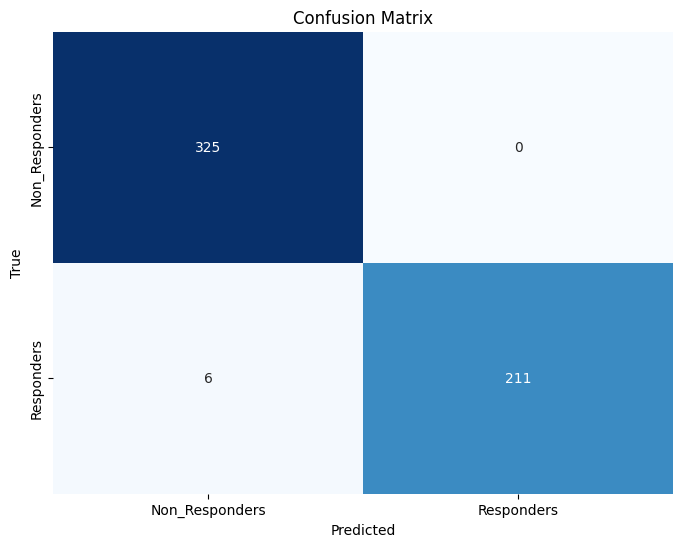

Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       325
           1       1.00      0.97      0.99       217

    accuracy                           0.99       542
   macro avg       0.99      0.99      0.99       542
weighted avg       0.99      0.99      0.99       542



In [55]:
# Function to plot confusion matrix
def plot_confusion_matrix(conf_matrix, class_names):
    fig, ax = plt.subplots(figsize=(8, 6))
    
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=class_names, yticklabels=class_names)
    
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

# Assuming you already have the confusion matrix (conf_matrix) and class names
class_names = ['Non_Responders', 'Responders']
plot_confusion_matrix(conf_matrix, class_names)


# Calculate classification report
class_report = classification_report(true_labels, evaluation_pred_classes)
print("Classification Report:")
print(class_report)


In [56]:
print(evaluation_generator.classes)

[1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 

In [57]:
# Get true labels
true_labels = evaluation_generator.classes

# Predict on the evaluation set
evaluation_predictions = model.predict(evaluation_generator)
predicted_labels = (evaluation_predictions > 0.5).astype(int)

# Initialize counters for correct and incorrect predictions
correct_predictions = 0
incorrect_predictions = 0

# Iterate over all predictions
for i in range(len(true_labels)):
    if true_labels[i] == predicted_labels[i]:
        correct_predictions += 1
    else:
        incorrect_predictions += 1

# Calculate accuracy
accuracy = correct_predictions / (correct_predictions + incorrect_predictions)

# Print the results
print("Correct Predictions:", correct_predictions)
print("Incorrect Predictions:", incorrect_predictions)
print("Accuracy:", accuracy)

17/17 [==============================] - 3s 159ms/step
Correct Predictions: 536
Incorrect Predictions: 6
Accuracy: 0.988929889298893


In [58]:
# confusion matrix (conf_matrix) and class names
class_names = ['Non_Responders', 'Responders']

# Print confusion matrix with counts
for i in range(len(class_names)):
    print(f"\nClass: {i} ({class_names[i]})")
    true_positives = conf_matrix[i, i]
    true_negatives = np.sum(np.delete(np.delete(conf_matrix, i, axis=0), i, axis=1))
    false_positives = np.sum(conf_matrix[:, i]) - true_positives
    false_negatives = np.sum(conf_matrix[i, :]) - true_positives

    print(f"True Positives (TP): {true_positives}")
    print(f"True Negatives (TN): {true_negatives}")
    print(f"False Positives (FP): {false_positives}")
    print(f"False Negatives (FN): {false_negatives}")
    print("====================")

# calculate and print overall metrics
overall_accuracy = np.sum(np.diag(conf_matrix)) / np.sum(conf_matrix)
precision = np.diag(conf_matrix) / np.sum(conf_matrix, axis=0)
recall = np.diag(conf_matrix) / np.sum(conf_matrix, axis=1)

print("\nOverall Metrics:")
print(f"Overall Accuracy: {overall_accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")



Class: 0 (Non_Responders)
True Positives (TP): 325
True Negatives (TN): 211
False Positives (FP): 6
False Negatives (FN): 0

Class: 1 (Responders)
True Positives (TP): 211
True Negatives (TN): 325
False Positives (FP): 0
False Negatives (FN): 6

Overall Metrics:
Overall Accuracy: 0.988929889298893
Precision: [0.98187311 1.        ]
Recall: [1.         0.97235023]


In [59]:
# confusion matrix (conf_matrix) and class names
class_names = ['Non_Responders', 'Responders']

# Print class-specific metrics
for i in range(len(class_names)):
    precision = conf_matrix[i, i] / np.sum(conf_matrix[:, i]) if np.sum(conf_matrix[:, i]) != 0 else 0
    recall = conf_matrix[i, i] / np.sum(conf_matrix[i, :]) if np.sum(conf_matrix[i, :]) != 0 else 0
    specificity = np.sum(np.delete(np.delete(conf_matrix, i, axis=0), i, axis=1)) / (np.sum(conf_matrix) - np.sum(conf_matrix[:, i]) - np.sum(conf_matrix[i, :]) + conf_matrix[i, i])
    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0

    print(f"\nClass: {class_names[i]}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"Specificity: {specificity:.4f}")
    print(f"F1-score: {f1_score:.4f}")
    print("====================")



Class: Non_Responders
Precision: 0.9819
Recall: 1.0000
Specificity: 1.0000
F1-score: 0.9909

Class: Responders
Precision: 1.0000
Recall: 0.9724
Specificity: 1.0000
F1-score: 0.9860


In [60]:
# Calculate classification report
class_report = classification_report(true_labels, evaluation_pred_classes)
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       325
           1       1.00      0.97      0.99       217

    accuracy                           0.99       542
   macro avg       0.99      0.99      0.99       542
weighted avg       0.99      0.99      0.99       542



17/17 [==============================] - 3s 158ms/step


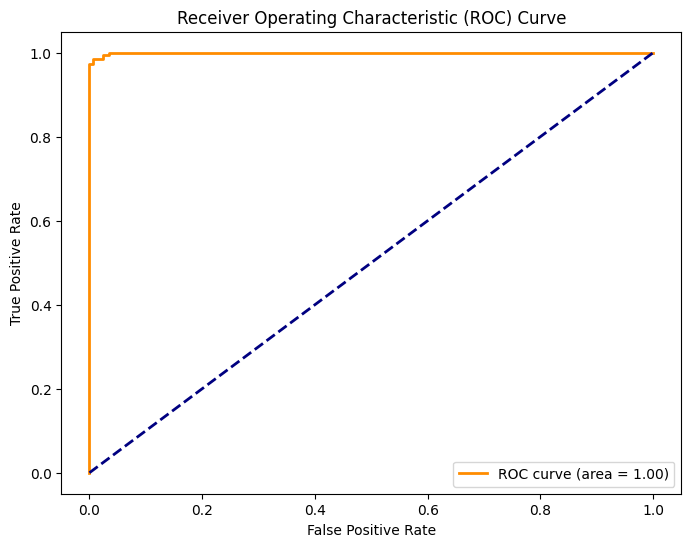

In [61]:
# true labels and predicted probabilities
true_labels = evaluation_generator.classes
predicted_probabilities = model.predict(evaluation_generator)

# Compute ROC curve and ROC area for each class
fpr, tpr, thresholds = roc_curve(true_labels, predicted_probabilities)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


17/17 [==============================] - 3s 151ms/step


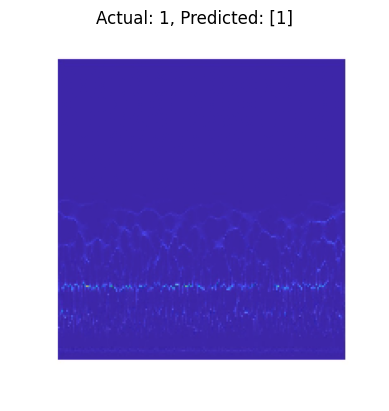

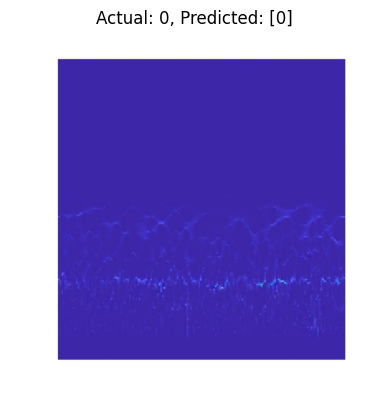

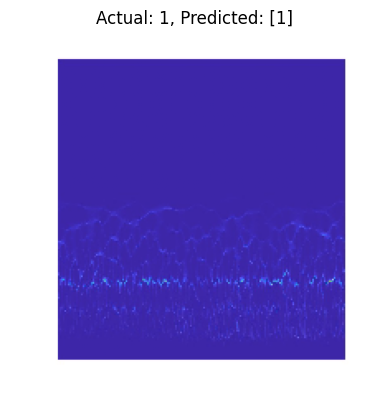

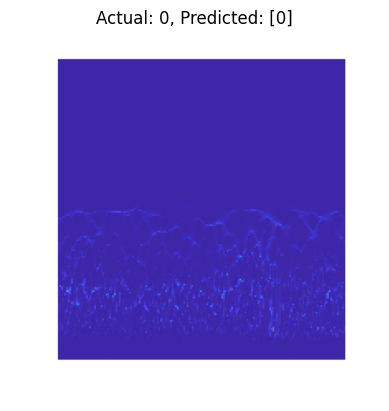

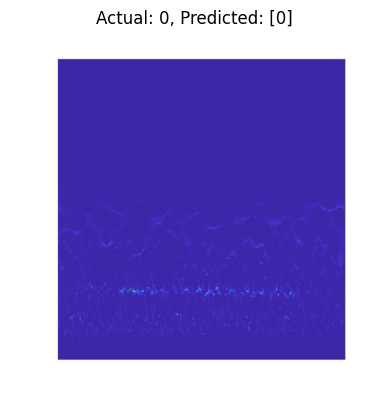

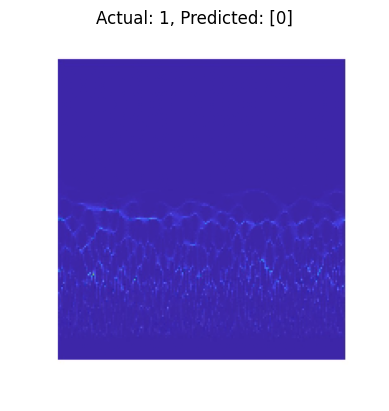

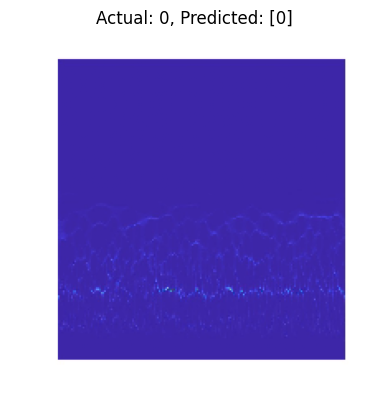

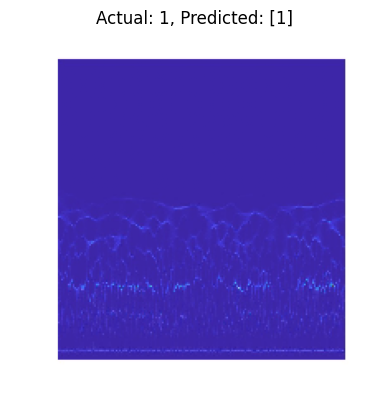

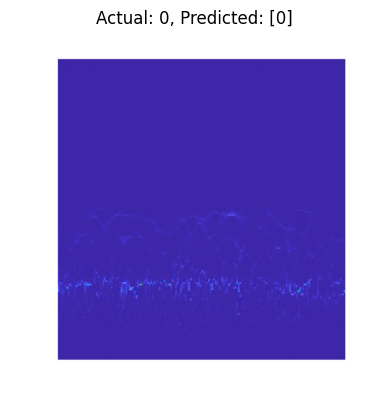

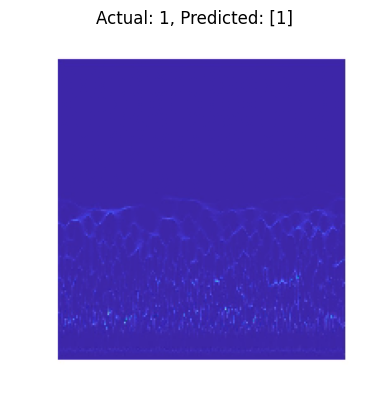

In [63]:
# Placeholder function for loading and preprocessing images
def load_and_preprocess_image(image_path):
    img = keras_image.load_img(image_path, target_size=(224, 224))
    img_array = keras_image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0  # Normalize pixel values to be between 0 and 1
    return img_array


# Get true labels
true_labels = evaluation_generator.classes

# Predict on the evaluation set
evaluation_predictions = model.predict(evaluation_generator)
predicted_labels = (evaluation_predictions > 0.5).astype(int)

# Display images along with actual and predicted labels
for i in range(len(true_labels[:10])):
    image_path = evaluation_set['path'].iloc[i]
    actual_label = true_labels[i]
    predicted_label = predicted_labels[i]

    # Load and preprocess the image
    image = load_and_preprocess_image(image_path)

    # Display the image
    plt.imshow(image[0])  # Since image is a batch, select the first element
    plt.title(f"Actual: {actual_label}, Predicted: {predicted_label}")
    plt.axis('off')
    plt.show()


In [64]:
# Load the saved CNN model
loaded_model = load_model('/kaggle/working/CNN_f4_12_ACC_98_89.h5')

# evaluation set
evaluation_set = test_df

# Evaluate the loaded model on the evaluation set
evaluation_generator = test_datagen.flow_from_dataframe(
    dataframe=evaluation_set,
    x_col='path',
    y_col='label',
    target_size=(224, 224),
    batch_size=batch_size,
    seed=1234,
    shuffle=False,
    class_mode='binary'
)

# Evaluate the model
evaluation_loss, evaluation_accuracy = loaded_model.evaluate(evaluation_generator)

print("Evaluation Loss:", evaluation_loss)
print("Evaluation Accuracy:", evaluation_accuracy)

Found 542 validated image filenames belonging to 2 classes.
17/17 [==============================] - 3s 163ms/step - loss: 0.0340 - accuracy: 0.9889
Evaluation Loss: 0.033986661583185196
Evaluation Accuracy: 0.9889298677444458
